# Assignment 1

#### Roll Number : 2018113003, 2018114001

## Question 1

In [1]:
## Importing dependancies

from sklearn import linear_model,preprocessing
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
import statistics

## Formatting the data

Changing the dataset given into the required parameters, i.e. 90:10 ratio of training to test, and further dividing training set into 10 different sets
    
To do that
- Shuffle the data given by using the numpy.shuffle method 
- Divide the dataset into training and testing in the ratio of 90:10 
- Make a list which defines the ranges of the individual training sets without dividing the array inot 10 different arrays

In [2]:
## Opening the dataset

dataset = open("Q1_data/data.pkl",'rb')
data = pickle.load(dataset)

In [3]:
## Splitting the dataset into 90:10 ratio

np.random.shuffle(data)
train,test = data[:math.floor(len(data)*0.9),:],data[math.floor(len(data)*0.9):,:]

## Lengths for dividing the training set into 10 datasets
lengths = [[i,i -1 + int(0.1*len(train[:,0]))] for i in range(0,len(train),int(len(train)*0.1))]

## Getting a model

Getting the polynomials required for predicting the values of the testing set, and raising the polynomial features of the x coordinate of the teting set for availing the predict() function.

To do that:
- Loop over all the degrees, and the datasets ( which in this case means looping ove the list which contained the ranges of the training sets ) 
- Generate an object which raises the features to the $i^{th}$ degree, after which append the raised features to the model list
- Raise the features of the test set as well, so it can use the prdict() function

In [4]:
## Modelling

model = []
X = []
degree = 10
for i in range(degree):
    for l in lengths:
        mult = preprocessing.PolynomialFeatures(i)
        X.append(mult.fit_transform(train[l[0]:l[1],None,0]))
        model.append(linear_model.LinearRegression().fit(X[-1],train[l[0]:l[1],None,1]))

## Getting the raised parametes for the testing set for it to work with predict() function
        
test_raised = []
for i in range(degree):
    mult = preprocessing.PolynomialFeatures(i)
    test_raised.append(mult.fit_transform(test[:,None,0]))

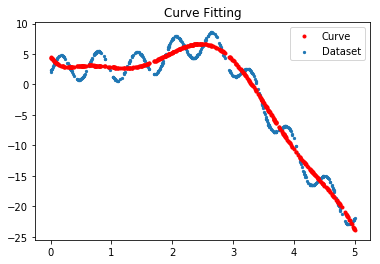

In [5]:
plt.scatter(test[:,0],test[:,1],s=5)
plt.plot(test[:,None,0], model[-1].predict(test_raised[-1]),"r.")
plt.title('Curve Fitting')
plt.legend(['Curve','Dataset'])
plt.show()

## Getting the prediction matrix

Getting the matrix that has the prediction of every point across every model across every degree in a $10x10x500$ matrix, and making it a numpy array for vecorized operations

To do that :
- Loop across the models (100 of them), and append the matrix with the prediciton values.
- After every 10 iterations, the degree of the model increases by 1, so append the matrix of the predictions per degree into the complete prediction matrix

In [6]:
## Average, mean value of a point

predict = []
poly_degree = []
for i in range(len(model)):
    if i%10 == 0 and i!=0 or i == len(model) - 1:
        poly_degree = np.asarray(poly_degree)
        predict.append(poly_degree)
        poly_degree = []
    poly_degree.append(model[i].predict(test_raised[i//10]))
predict = np.asarray(predict)

## Calculating Bias

For calculation of bias, first for every 10 models of a single degree, compute mean for every point. After that compute $E(y - \sum f(x)/n)$ and make it for every degree.

Hence, calculation of bias :

$ bias^2 = E(\frac{\sum_{x_i \in degree} f(x_i)^2}{n} - y_i)$

## Calculating Variance

Similarly for the computation of bias, calculate the standard deviation at every point, and then average them over the common degree, after which plot it as a function of degree.

Hence, the calculation of variance :

$ var = Avg(Var (f(x_i)) $

In [7]:
## Calculating Bias 

bias = [(predict[i].mean(axis = 0)) for i in range(len(predict))]
bias = np.asarray(bias)

## Subtracting the values of y_i from each
bias = [np.absolute((bias[i] - test[:,None,1])**2).mean() for i in range(len(bias))]
bias = np.asarray(bias)

In [8]:
## Calculating Variance

variance = [(predict[i].var(axis = 0)) for i in range(len(predict))]
variance = [variance[i].mean() for i in range(len(variance))]
variance = np.asarray(variance)

In [9]:
## Values of the Bias and Variance

print('Bias Squared:')
print(bias)
print()
print('Variance :')
print(variance)

Bias Squared:
[76.63893215 30.47807775  5.61198758  5.04576155  3.19194941  2.97925465
  2.6825385   2.54775139  2.54399812  2.53173424]

Variance :
[0.26389878 0.17689566 0.03346661 0.03122343 0.03927378 0.03597408
 0.03515789 0.0489775  0.06629357 0.07497564]


## Plotting

Plotting the graphs of bias and variance, to get the general trends of the values using the graphs

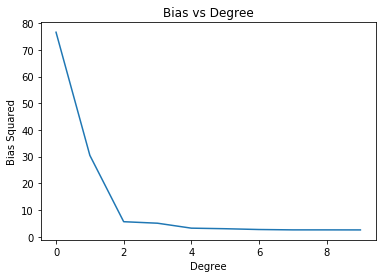

In [10]:
plt.plot(bias)
plt.xlabel('Degree')
plt.ylabel('Bias Squared')
plt.title('Bias vs Degree')
plt.show()

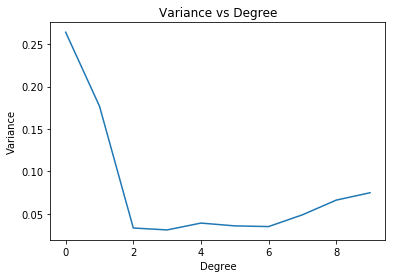

In [11]:
plt.plot(variance)
plt.xlabel('Degree')
plt.ylabel('Variance')
plt.title('Variance vs Degree')
plt.show()

## Bias - Variance Observations

The bias plot is a decreasing curve, which shows that the offset in the values is decreasing, which is what is expected from a higher degree polynomial. But in the case of the variance, it is expected to increase due to the case of overfitting, which is not happening. This is because the original dataset is a curve of a polynomial of degree around 20, so till the degree of the curve fitting the dataset is above that value, it will not overfitt.

Hence, as the dataset is of a higher degree curve than the models computed, overfitting is not seen, but the bias is decreasing as normally expected as a higher order curve has a less of a bias as it fits the data better.

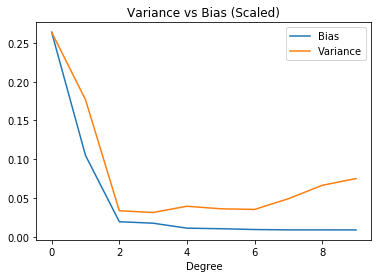

In [12]:
plt.plot(bias * (variance.max() / bias.max()))
plt.plot(variance)
plt.xlabel('Degree')
plt.legend(['Bias','Variance'])
plt.title('Variance vs Bias (Scaled)')
plt.show()